# Query WOD THREDDS to create histogram of casts per year

WOD THREDDS catalog: https://www.ncei.noaa.gov/thredds-ocean/catalog/ncei/wod/catalog.html

<a href="https://colab.research.google.com/github/MathewBiddle/sandbox/blob/main/notebooks/WODsummaryofcastsbyyear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr
import pandas as pd

# Create an array of years to query datasets

In [2]:
years = range(1900,2024)

years

range(1900, 2024)

# Go out and query datasets.

For datasets that are successful, only return `wod_unique_cast`, `lat`, `lon`, and `time`.

If a dataset fails, print the url and state it failed.

In [3]:
casts = pd.DataFrame()

for year in years:

  url=f'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/{year}/wod_osd_{year}.nc'

  try:
    ds = xr.open_dataset(url)
  except:
    print(f'{url} failed.')
    continue

  data = ds[['wod_unique_cast','lat','lon','time']].to_dataframe()
  data['url'] = url
    
  casts = pd.concat([casts, data], ignore_index=True)

casts = casts.set_index(pd.to_datetime(casts['time']))

casts

https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/2020/wod_osd_2020.nc failed.
https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/2023/wod_osd_2023.nc failed.


,wod_unique_cast,lat,lon,time,url
time,,,,,
1900-01-01 06:59:59.999141888,12118764,55.299999,12.783334,1900-01-01 06:59:59.999141888,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...
1900-01-01 06:59:59.999141888,12118765,55.616665,12.883333,1900-01-01 06:59:59.999141888,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...
1900-01-01 06:59:59.999141888,12118766,55.583332,12.850000,1900-01-01 06:59:59.999141888,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...
1900-01-01 06:59:59.999141888,12118767,56.166668,12.516666,1900-01-01 06:59:59.999141888,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...
1900-01-01 06:59:59.999141888,12118768,55.950001,15.700000,1900-01-01 06:59:59.999141888,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...
...,...,...,...,...,...
2022-07-23 18:09:59.997711360,22165431,57.957722,-22.513580,2022-07-23 18:09:59.997711360,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...
2022-07-24 00:38:59.999860736,22165432,57.958740,-23.835400,2022-07-24 00:38:59.999860736,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...
2022-07-24 05:39:59.999427584,22165433,57.960941,-24.487740,2022-07-24 05:39:59.999427584,https://www.ncei.noaa.gov/thredds-ocean/dodsC/...


# Files with problematic times:

Our query was to look for WOD OSD datasets from 1900 to 2024. Therefore, any dates before 1900 are incorrectly represented. Below gives us the full list of all the datasets with a time value before 1900-01-01 (could be one or multiple values in the source data.

In [4]:
casts.loc[:'1899']['url'].unique()

array(['https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1904/wod_osd_1904.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1907/wod_osd_1907.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1922/wod_osd_1922.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1928/wod_osd_1928.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1929/wod_osd_1929.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1936/wod_osd_1936.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1941/wod_osd_1941.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1950/wod_osd_1950.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1951/wod_osd_1951.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1952/wod_osd_1952.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1953/wod_osd_1953.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/

## Files that look good.

In [5]:
casts.sort_index()['1899':]['url'].unique()

array(['https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1900/wod_osd_1900.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1901/wod_osd_1901.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1902/wod_osd_1902.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1903/wod_osd_1903.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1904/wod_osd_1904.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1905/wod_osd_1905.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1906/wod_osd_1906.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1907/wod_osd_1907.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1908/wod_osd_1908.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1909/wod_osd_1909.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/wod/1910/wod_osd_1910.nc',
       'https://www.ncei.noaa.gov/thredds-ocean/dodsC/

# Count the casts by Year for all profiles after 1900.

In [12]:
group = casts.sort_index()['1899':].groupby(by=pd.Grouper(freq='Y')) # only >1900

cast_counts = group[['wod_unique_cast']].count()

cast_counts.index = cast_counts.index.to_period("Y")

cast_counts = cast_counts.reset_index(allow_duplicates=True)

cast_counts.rename(columns={'wod_unique_cast':'wod_unique_cast_count'}, inplace=True)

cast_counts

,time,wod_unique_cast_count
0,1900,6463
1,1901,6748
2,1902,7020
3,1903,7903
4,1904,7868
...,...,...
118,2018,2043
119,2019,1264
120,2020,0
121,2021,424


# Make a histogram of the number of casts per year.

<AxesSubplot: xlabel='time2'>

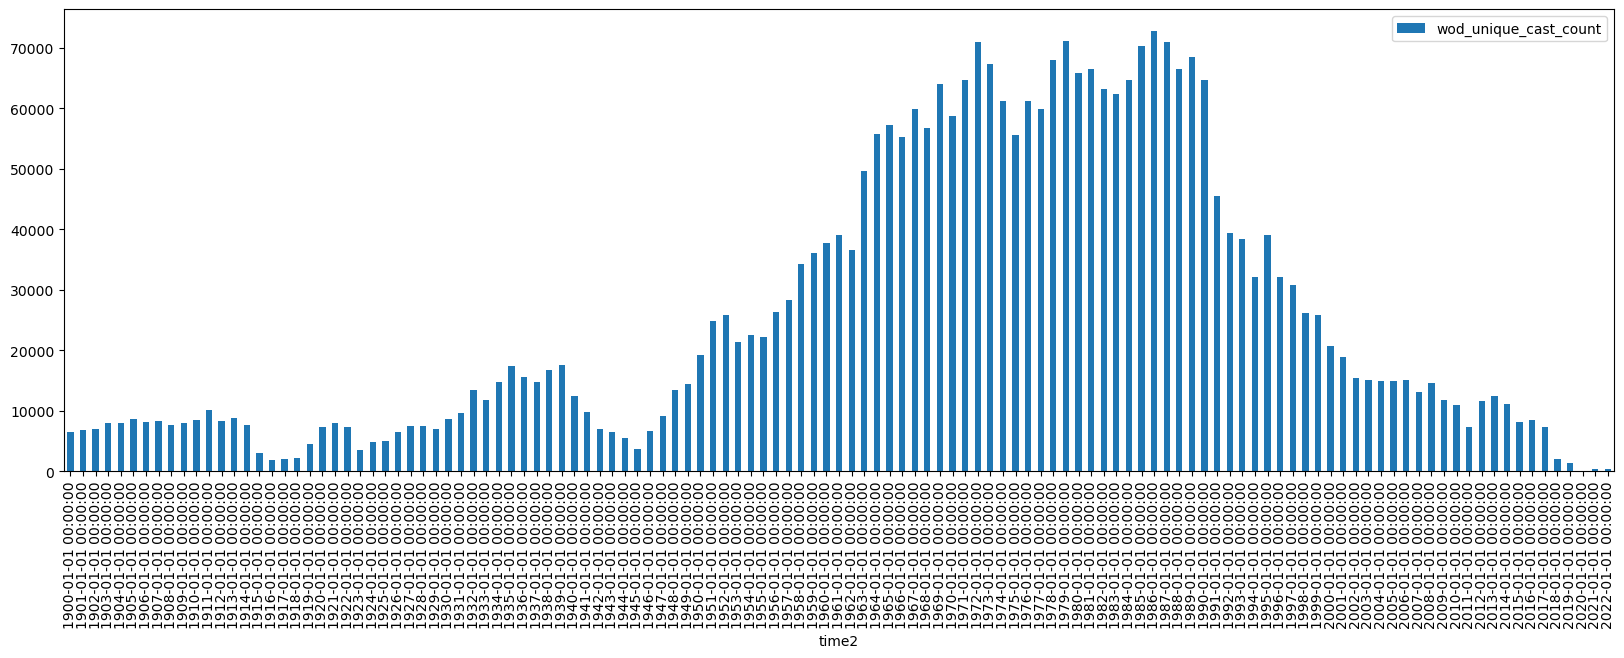

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

fig = plt.figure(figsize=(20,6))

cast_counts['time2'] = pd.to_datetime(cast_counts['time'].dt.to_timestamp())

data = cast_counts.set_index('time2')

ax = fig.add_subplot()

data.plot(kind='bar', ax=ax)

# ax.xaxis.set_major_locator(mdates.YearLocator(5, month=1,day=1))

# ax.xaxis.set_minor_locator(mdates.YearLocator())

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


# Print out the data from histogram

In [15]:
# print(data.to_markdown())

| time2               | time   |   wod_unique_cast_count |
|:--------------------|:-------|------------------------:|
| 1900-01-01 00:00:00 | 1900   |                    6463 |
| 1901-01-01 00:00:00 | 1901   |                    6748 |
| 1902-01-01 00:00:00 | 1902   |                    7020 |
| 1903-01-01 00:00:00 | 1903   |                    7903 |
| 1904-01-01 00:00:00 | 1904   |                    7868 |
| 1905-01-01 00:00:00 | 1905   |                    8551 |
| 1906-01-01 00:00:00 | 1906   |                    8038 |
| 1907-01-01 00:00:00 | 1907   |                    8210 |
| 1908-01-01 00:00:00 | 1908   |                    7551 |
| 1909-01-01 00:00:00 | 1909   |                    7963 |
| 1910-01-01 00:00:00 | 1910   |                    8435 |
| 1911-01-01 00:00:00 | 1911   |                   10025 |
| 1912-01-01 00:00:00 | 1912   |                    8248 |
| 1913-01-01 00:00:00 | 1913   |                    8799 |
| 1914-01-01 00:00:00 | 1914   |                    7655 |
| 1915-01-01 00:00:00 | 1915   |                    3041 |
| 1916-01-01 00:00:00 | 1916   |                    1845 |
| 1917-01-01 00:00:00 | 1917   |                    1941 |
| 1918-01-01 00:00:00 | 1918   |                    2128 |
| 1919-01-01 00:00:00 | 1919   |                    4471 |
| 1920-01-01 00:00:00 | 1920   |                    7311 |
| 1921-01-01 00:00:00 | 1921   |                    7930 |
| 1922-01-01 00:00:00 | 1922   |                    7246 |
| 1923-01-01 00:00:00 | 1923   |                    3538 |
| 1924-01-01 00:00:00 | 1924   |                    4817 |
| 1925-01-01 00:00:00 | 1925   |                    4928 |
| 1926-01-01 00:00:00 | 1926   |                    6506 |
| 1927-01-01 00:00:00 | 1927   |                    7509 |
| 1928-01-01 00:00:00 | 1928   |                    7524 |
| 1929-01-01 00:00:00 | 1929   |                    6929 |
| 1930-01-01 00:00:00 | 1930   |                    8667 |
| 1931-01-01 00:00:00 | 1931   |                    9557 |
| 1932-01-01 00:00:00 | 1932   |                   13460 |
| 1933-01-01 00:00:00 | 1933   |                   11786 |
| 1934-01-01 00:00:00 | 1934   |                   14686 |
| 1935-01-01 00:00:00 | 1935   |                   17380 |
| 1936-01-01 00:00:00 | 1936   |                   15517 |
| 1937-01-01 00:00:00 | 1937   |                   14765 |
| 1938-01-01 00:00:00 | 1938   |                   16774 |
| 1939-01-01 00:00:00 | 1939   |                   17523 |
| 1940-01-01 00:00:00 | 1940   |                   12378 |
| 1941-01-01 00:00:00 | 1941   |                    9755 |
| 1942-01-01 00:00:00 | 1942   |                    7025 |
| 1943-01-01 00:00:00 | 1943   |                    6388 |
| 1944-01-01 00:00:00 | 1944   |                    5389 |
| 1945-01-01 00:00:00 | 1945   |                    3693 |
| 1946-01-01 00:00:00 | 1946   |                    6595 |
| 1947-01-01 00:00:00 | 1947   |                    9131 |
| 1948-01-01 00:00:00 | 1948   |                   13392 |
| 1949-01-01 00:00:00 | 1949   |                   14425 |
| 1950-01-01 00:00:00 | 1950   |                   19153 |
| 1951-01-01 00:00:00 | 1951   |                   24757 |
| 1952-01-01 00:00:00 | 1952   |                   25868 |
| 1953-01-01 00:00:00 | 1953   |                   21269 |
| 1954-01-01 00:00:00 | 1954   |                   22483 |
| 1955-01-01 00:00:00 | 1955   |                   22097 |
| 1956-01-01 00:00:00 | 1956   |                   26313 |
| 1957-01-01 00:00:00 | 1957   |                   28253 |
| 1958-01-01 00:00:00 | 1958   |                   34207 |
| 1959-01-01 00:00:00 | 1959   |                   36014 |
| 1960-01-01 00:00:00 | 1960   |                   37683 |
| 1961-01-01 00:00:00 | 1961   |                   39019 |
| 1962-01-01 00:00:00 | 1962   |                   36579 |
| 1963-01-01 00:00:00 | 1963   |                   49662 |
| 1964-01-01 00:00:00 | 1964   |                   55712 |
| 1965-01-01 00:00:00 | 1965   |                   57137 |
| 1966-01-01 00:00:00 | 1966   |                   55159 |
| 1967-01-01 00:00:00 | 1967   |                   59933 |
| 1968-01-01 00:00:00 | 1968   |                   56746 |
| 1969-01-01 00:00:00 | 1969   |                   63936 |
| 1970-01-01 00:00:00 | 1970   |                   58777 |
| 1971-01-01 00:00:00 | 1971   |                   64594 |
| 1972-01-01 00:00:00 | 1972   |                   70976 |
| 1973-01-01 00:00:00 | 1973   |                   67229 |
| 1974-01-01 00:00:00 | 1974   |                   61122 |
| 1975-01-01 00:00:00 | 1975   |                   55494 |
| 1976-01-01 00:00:00 | 1976   |                   61224 |
| 1977-01-01 00:00:00 | 1977   |                   59924 |
| 1978-01-01 00:00:00 | 1978   |                   67960 |
| 1979-01-01 00:00:00 | 1979   |                   71014 |
| 1980-01-01 00:00:00 | 1980   |                   65821 |
| 1981-01-01 00:00:00 | 1981   |                   66494 |
| 1982-01-01 00:00:00 | 1982   |                   63117 |
| 1983-01-01 00:00:00 | 1983   |                   62413 |
| 1984-01-01 00:00:00 | 1984   |                   64721 |
| 1985-01-01 00:00:00 | 1985   |                   70324 |
| 1986-01-01 00:00:00 | 1986   |                   72733 |
| 1987-01-01 00:00:00 | 1987   |                   70970 |
| 1988-01-01 00:00:00 | 1988   |                   66438 |
| 1989-01-01 00:00:00 | 1989   |                   68528 |
| 1990-01-01 00:00:00 | 1990   |                   64587 |
| 1991-01-01 00:00:00 | 1991   |                   45507 |
| 1992-01-01 00:00:00 | 1992   |                   39329 |
| 1993-01-01 00:00:00 | 1993   |                   38364 |
| 1994-01-01 00:00:00 | 1994   |                   32030 |
| 1995-01-01 00:00:00 | 1995   |                   39015 |
| 1996-01-01 00:00:00 | 1996   |                   32146 |
| 1997-01-01 00:00:00 | 1997   |                   30748 |
| 1998-01-01 00:00:00 | 1998   |                   26206 |
| 1999-01-01 00:00:00 | 1999   |                   25770 |
| 2000-01-01 00:00:00 | 2000   |                   20713 |
| 2001-01-01 00:00:00 | 2001   |                   18783 |
| 2002-01-01 00:00:00 | 2002   |                   15408 |
| 2003-01-01 00:00:00 | 2003   |                   15069 |
| 2004-01-01 00:00:00 | 2004   |                   14825 |
| 2005-01-01 00:00:00 | 2005   |                   14845 |
| 2006-01-01 00:00:00 | 2006   |                   15066 |
| 2007-01-01 00:00:00 | 2007   |                   13157 |
| 2008-01-01 00:00:00 | 2008   |                   14612 |
| 2009-01-01 00:00:00 | 2009   |                   11785 |
| 2010-01-01 00:00:00 | 2010   |                   10864 |
| 2011-01-01 00:00:00 | 2011   |                    7272 |
| 2012-01-01 00:00:00 | 2012   |                   11554 |
| 2013-01-01 00:00:00 | 2013   |                   12446 |
| 2014-01-01 00:00:00 | 2014   |                   11081 |
| 2015-01-01 00:00:00 | 2015   |                    8063 |
| 2016-01-01 00:00:00 | 2016   |                    8476 |
| 2017-01-01 00:00:00 | 2017   |                    7348 |
| 2018-01-01 00:00:00 | 2018   |                    2043 |
| 2019-01-01 00:00:00 | 2019   |                    1264 |
| 2020-01-01 00:00:00 | 2020   |                       0 |
| 2021-01-01 00:00:00 | 2021   |                     424 |
| 2022-01-01 00:00:00 | 2022   |                     319 |